In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
concStrength = pd.read_csv('Compressive Strength.csv')
concStrength.head()

,Cement (kg/m3),Blast-furnace Slag (kg/m3),Fly Ash (kg/m3),Water (kg/m3),Super-plasticizer (kg/m3),Coarse Aggregate (kg/m3),Fine Aggregate (kg/m3),Age of testing (day),Concrete compressive strength (MPa)
0,336.0,0.0,0.0,182.0,3.0,986.0,817.0,28,44.86
1,140.1,4.2,215.9,193.9,4.7,1049.5,710.1,28,26.42
2,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.53
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,28,42.08
4,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7,11.17


In [2]:
concStrength.columns = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', "Water", 'Super_Plasticizer', 
                       'Coarse_Aggregate', 'Fine_Aggregate', 'Age_of_testing', 'Concrete_Compresssive_strength']
concStrength.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age_of_testing,Concrete_Compresssive_strength
0,336.0,0.0,0.0,182.0,3.0,986.0,817.0,28,44.86
1,140.1,4.2,215.9,193.9,4.7,1049.5,710.1,28,26.42
2,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.53
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,28,42.08
4,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7,11.17


In [3]:
concStrength.isna().sum()

Cement                            0
Blast_Furnace_Slag                0
Fly_Ash                           0
Water                             0
Super_Plasticizer                 0
Coarse_Aggregate                  0
Fine_Aggregate                    0
Age_of_testing                    0
Concrete_Compresssive_strength    0
dtype: int64

In [4]:
concStrength['Concrete_Compresssive_strength'].describe()

count    1133.000000
mean       35.838094
std        16.100569
min         2.330000
25%        24.390000
50%        34.670000
75%        44.870000
max        82.600000
Name: Concrete_Compresssive_strength, dtype: float64

In [5]:
concStrength.Age_of_testing.value_counts()

28     528
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: Age_of_testing, dtype: int64

In [6]:
X= concStrength.drop('Concrete_Compresssive_strength', axis = 1)
y = concStrength[['Concrete_Compresssive_strength']]

In [34]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled  = scale.transform(X_test)
X_train_scaled  = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [41]:
X_test_scaled.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age_of_testing
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,0.085816,0.042113,-0.026408,0.011493,0.042207,-0.031977,-0.109663,-0.009471
std,1.024746,1.021867,1.023725,0.919030,1.037295,0.970405,0.974543,0.969747
min,-1.670439,-0.872608,-0.896454,-2.726422,-1.106848,-3.079079,-2.248242,-0.707626
25%,-0.774574,-0.872608,-0.896454,-0.663702,-1.106848,-0.537320,-0.736060,-0.609546
50%,0.039227,-0.585161,-0.896454,0.094487,0.094763,-0.006046,-0.013222,-0.266266
75%,0.742632,0.864049,0.818934,0.451282,0.706516,0.738037,0.408615,0.191442
max,2.608610,3.224705,2.601460,2.855186,4.533365,2.010409,2.730125,5.242569


In [42]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [43]:
model.predict(X_test_scaled[:10])

array([[37.04269738],
       [22.26671491],
       [36.14544305],
       [37.45589777],
       [30.59486017],
       [20.27832131],
       [45.80607789],
       [40.36249848],
       [38.91283608],
       [37.9429131 ]])

In [44]:
np.array(y_test[:10])

array([[21.86],
       [35.23],
       [40.93],
       [35.86],
       [38.6 ],
       [29.23],
       [50.66],
       [38.19],
       [35.66],
       [33.05]])

In [45]:
model.score(X_test_scaled, y_test)

0.6192613019864958

In [46]:
model.score(X_train_scaled, y_train)

0.6075869028874532

In [84]:
#from sklearn.linear_model import Lasso, Ridge
#Lasso_reg = Lasso(alpha = 0.01, max_iter = 1000,tol = 0.00001 )
#Ridge_reg = Ridge(alpha = 0.01, max_iter = 1000,tol = 0.00001 )
#Lasso_reg.fit(X_train_scaled, y_train)
#Ridge_reg.fit(X_train_scaled, y_train)

In [48]:
Lasso_reg.score(X_test_scaled, y_test)

0.6189867152227524

In [16]:
y_scale = np.array([[336,0,0,182,3,986,817,28]])
model.predict(scale.transform(y_scale))

array([[28.07717138]])

In [29]:
y_scale_2 = np.array([[160.1,5.2,315.9,143.9,7.7,2049.5,810.1,28]])
model.predict(scale.transform(y_scale_2))

array([[64.23451823]])

In [18]:
model.predict([[0.575, -0.882,-0.878,-0.0453,-0.5895,0.256,0.586,-0.266]])

array([[28.0696359]])

In [19]:
model.coef_

array([[13.40873107,  9.30000737,  7.65726238, -2.38881561,  1.40523936,
         1.51313592,  2.28071809,  6.66002048]])

In [20]:
model.intercept_

array([36.05317551])

In [21]:
y_pred = model.predict(X_test)
print(y_pred[:5])
print(np.array(y_test[:5]))

[[37.04269738]
 [22.26671491]
 [36.14544305]
 [37.45589777]
 [30.59486017]]
[[21.86]
 [35.23]
 [40.93]
 [35.86]
 [38.6 ]]


In [22]:
from sklearn.metrics import mean_squared_error 
mse =  mean_squared_error(y_test, y_pred)
mse

96.88579528847006

In [23]:
#scores = []
#Standard_deviation = []
#Average = []
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X_train, y_train, cv =10)
print('scores:\n', scores)
print('Standard Deviation:\n', scores.std())
print('Score Mean:\n' , scores.mean())
print('Variance:\n', np.sqrt(scores.std()))

scores:
 [0.627775   0.62513767 0.67517291 0.61633497 0.51908919 0.61485093
 0.45754952 0.46982251 0.63452903 0.63330923]
Standard Deviation:
 0.07213175962734932
Score Mean:
 0.5873570940800539
Variance:
 0.2685735646472849


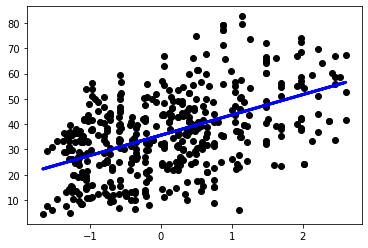

In [74]:
x0_test_1 = X_test_scaled.values[:,0]
x0_train_1 = X_train_scaled.values[:,0]
x0_test = x0_test_1[:,np.newaxis]
x0_train = x0_train_1[:,np.newaxis]
model.fit(x0_train, y_train)
y = model.predict(x0_test)
plt.scatter(x0_test, y_test.values, color = 'k')
plt.plot(x0_test, y, color = 'b', linewidth = 3)


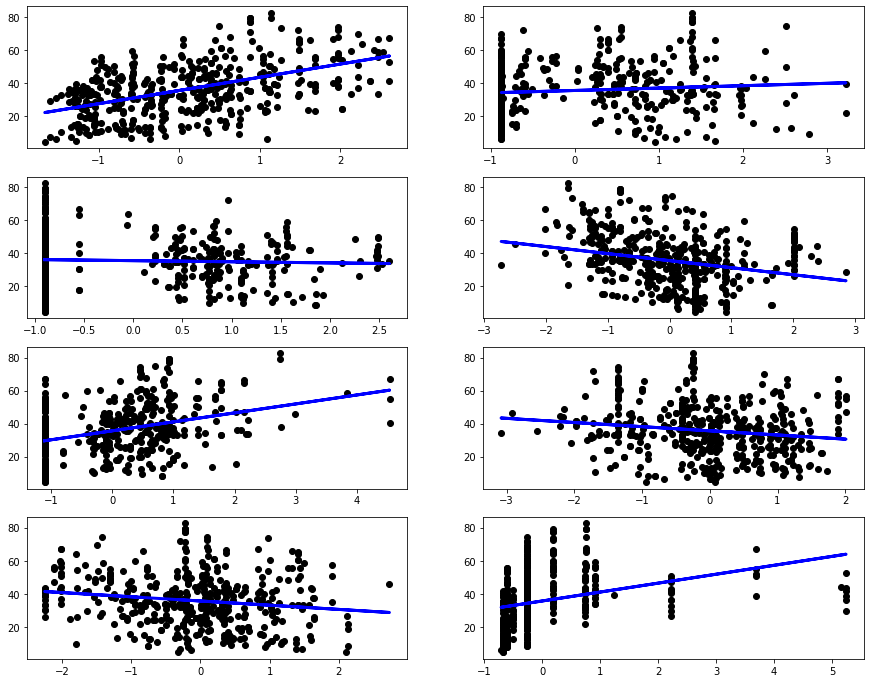

In [83]:
plt.figure(figsize = (15,12))
for f in range(0,8):
    xi_test = X_test_scaled.values[:,f]
    xi_train = X_train_scaled.values[:,f]
    xi_test = xi_test[:,np.newaxis]
    xi_train = xi_train[:,np.newaxis]
    model.fit(xi_train, y_train)
    y = model.predict(xi_test)
    plt.subplot(4,2, f+1)
    plt.scatter(xi_test, y_test.values, color = 'k')
    plt.plot(xi_test,y, color = 'b', linewidth = 3)

In [89]:
from joblib import dump, load
dump(model,'concStrength.pkl')

['concStrength.pkl']

In [90]:
models = load('concStrength.pkl')

In [91]:
y_model = np.array([[180,0.8,9,8,6.7,8,0.9,28]])